# Recognizing 7 seg digit
### input are values of 7 segments of the digital display. output is a binary representation of the number shown

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from IPython.display import SVG
from keras.utils.visualize_util import plot
from keras.utils.visualize_util import model_to_dot

Using Theano backend.


input and output data

In [2]:
zer = [1,1,1,1,1,1,0]
one = [0,1,1,0,0,0,0]
two = [1,1,0,1,1,0,1]
thr = [1,1,1,1,0,0,1]
fou = [0,1,1,0,0,1,1]
fiv = [1,0,1,1,0,1,1]
six = [1,0,1,1,1,1,1]
sev = [1,1,1,0,0,0,0]
eig = [1,1,1,1,1,1,1]
nin = [1,1,1,1,0,1,1]
eij = [1,1,1,0,1,1,1] #A
see = [1,0,0,1,1,1,0] #C
eee = [1,0,0,1,1,1,1] #E
inp=[zer, one, two, thr, fou, fiv, six, sev, eig, nin, eij, see, eee]
out=[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,1,0,0],[1,1,1,0]]


NN model

In [3]:
model = Sequential()
L1=Dense(output_dim=7, input_dim=7)
model.add(L1)
model.add(Activation("relu"))
L2=Dense(output_dim=4)
model.add(L2)
#model.add(Activation("softmax"))
model.add(BatchNormalization())
#model.add(model.add(lambda(rectifier)))
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.compile(loss='mse', optimizer='adagrad', metrics=['accuracy'])
#model.compile(loss='mse',optimizer='rmsprop', metrics=['accuracy'])
my_sgd = optimizers.SGD(lr=0.01, momentum=0.5, decay=0.1, nesterov=True)

model.compile(loss='mse',optimizer='sgd', metrics=['accuracy'])

#plot(model, to_file='model.png',show_shapes=True)
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

train

In [4]:
epochs=5000
hist = model.fit(inp, out, nb_epoch=epochs, batch_size=20, verbose=0, shuffle=True)

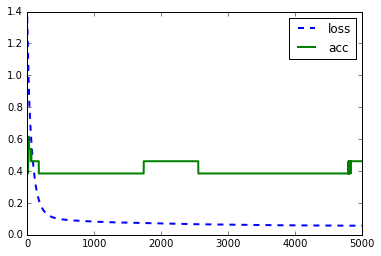

In [5]:
x = np.linspace(0,epochs-1,epochs)
plt.plot(x, hist.history['loss'], '--', linewidth=2, label='loss')
plt.plot(x, hist.history['acc'], '-', linewidth=2, label='acc')
plt.legend()
plt.show()

check results

In [6]:
loss_and_metrics = model.evaluate(inp, out, batch_size=13)
loss_and_metrics

13/13 [==============================] - 0s


[0.056986037641763687, 0.46153846383094788]

check the layers

In [8]:
L1.get_weights()
L2.get_weights()

[array([[ 0.11478914, -0.66447711,  0.25257382,  0.06768016],
        [-0.3989884 , -0.21793564, -0.40758863, -0.60475421],
        [ 0.18255739,  0.0495884 ,  0.40951869, -0.06075257],
        [-0.2592186 ,  0.15365779,  0.0853144 ,  0.42102554],
        [-0.54211485,  0.22255988,  0.17518792,  0.12902966],
        [ 0.34456351,  0.67794508,  0.47372445,  0.13512574],
        [-0.33313355, -0.31711045, -0.21545377,  0.39387491]], dtype=float32),
 array([  2.57019384e-09,   3.06319103e-09,   3.76191966e-09,
         -3.83237397e-09], dtype=float32)]

In [9]:
#proba = model.predict_proba(inp, batch_size=10)
pred = model.predict(inp, batch_size=13)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '2302172' (I am process '2302581')


In [10]:
for co,i in enumerate(pred):
    c=[]
    for j in i:
        if j>0.5: c.append(1)
        else: c.append(0)
    print(i,c, out[co])

[ 0.3940618  -0.04116294 -0.17409483  0.07812163] [0, 0, 0, 0] [0, 0, 0, 0]
[-0.13096166  0.03779644 -0.11831012  0.70361364] [0, 0, 0, 1] [0, 0, 0, 1]
[ 0.45150751 -0.07940915  1.11874354  0.03690132] [0, 0, 1, 0] [0, 0, 1, 0]
[ 0.06826797  0.12079248  0.78212148  1.09872437] [0, 0, 1, 1] [0, 0, 1, 1]
[ 0.29535741  0.98731434  0.05295932  0.30379176] [0, 1, 0, 0] [0, 1, 0, 0]
[ 0.42580849  0.8662042   0.20060143  0.9353168 ] [0, 1, 0, 1] [0, 1, 0, 1]
[ 0.58816171  1.04997575  0.81356633  0.11821812] [1, 1, 1, 0] [0, 1, 1, 0]
[ 0.00543797  0.94916117  1.12831783  1.13459826] [0, 1, 1, 1] [0, 1, 1, 1]
[ 0.4001247  -0.05883762  0.39572865 -0.03445104] [0, 0, 0, 0] [1, 0, 0, 0]
[ 0.25820079  0.05950901 -0.07528189  0.79855859] [0, 0, 0, 1] [1, 0, 0, 1]
[ 0.71880686  0.04844421  0.91755533 -0.168928  ] [1, 0, 1, 0] [1, 0, 1, 0]
[ 0.73470247  1.04864323  0.15298948  0.02914357] [1, 1, 0, 0] [1, 1, 0, 0]
[ 0.74075741  1.03091216  0.72278732 -0.08341032] [1, 1, 1, 0] [1, 1, 1, 0]
